In [76]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [30]:
xgboost = pd.read_csv('xgboost_Results.csv')
lightgbm = pd.read_csv('LightGB_Results.csv')

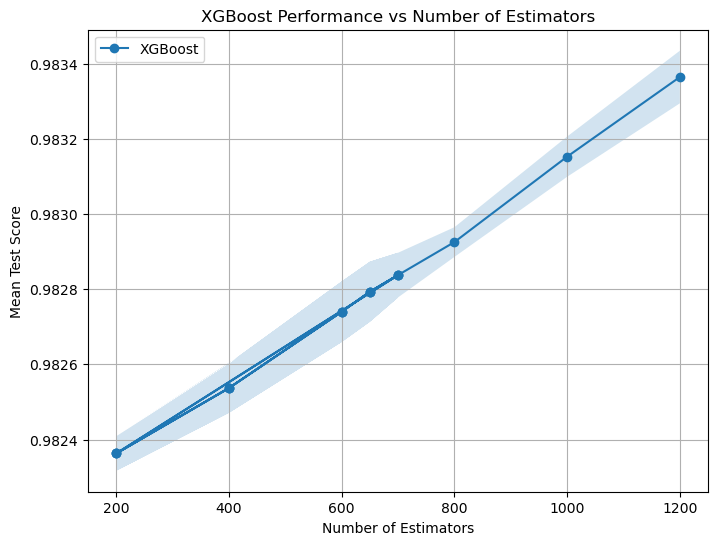

In [31]:
# Filter results for a fixed learning rate and max_depth
results_df = xgboost.copy()
subset = results_df[(results_df['param_learning_rate'] == 0.05) & 
                    (results_df['param_max_depth'] == 4)]

plt.figure(figsize=(8,6))
plt.plot(subset['param_n_estimators'], subset['mean_test_score'], marker='o', label="XGBoost")
plt.fill_between(subset['param_n_estimators'], 
                 subset['mean_test_score'] - subset['std_test_score'],
                 subset['mean_test_score'] + subset['std_test_score'], 
                 alpha=0.2)

plt.xlabel("Number of Estimators")
plt.ylabel("Mean Test Score")
plt.title("XGBoost Performance vs Number of Estimators")
plt.legend()
plt.grid(True)
plt.show()


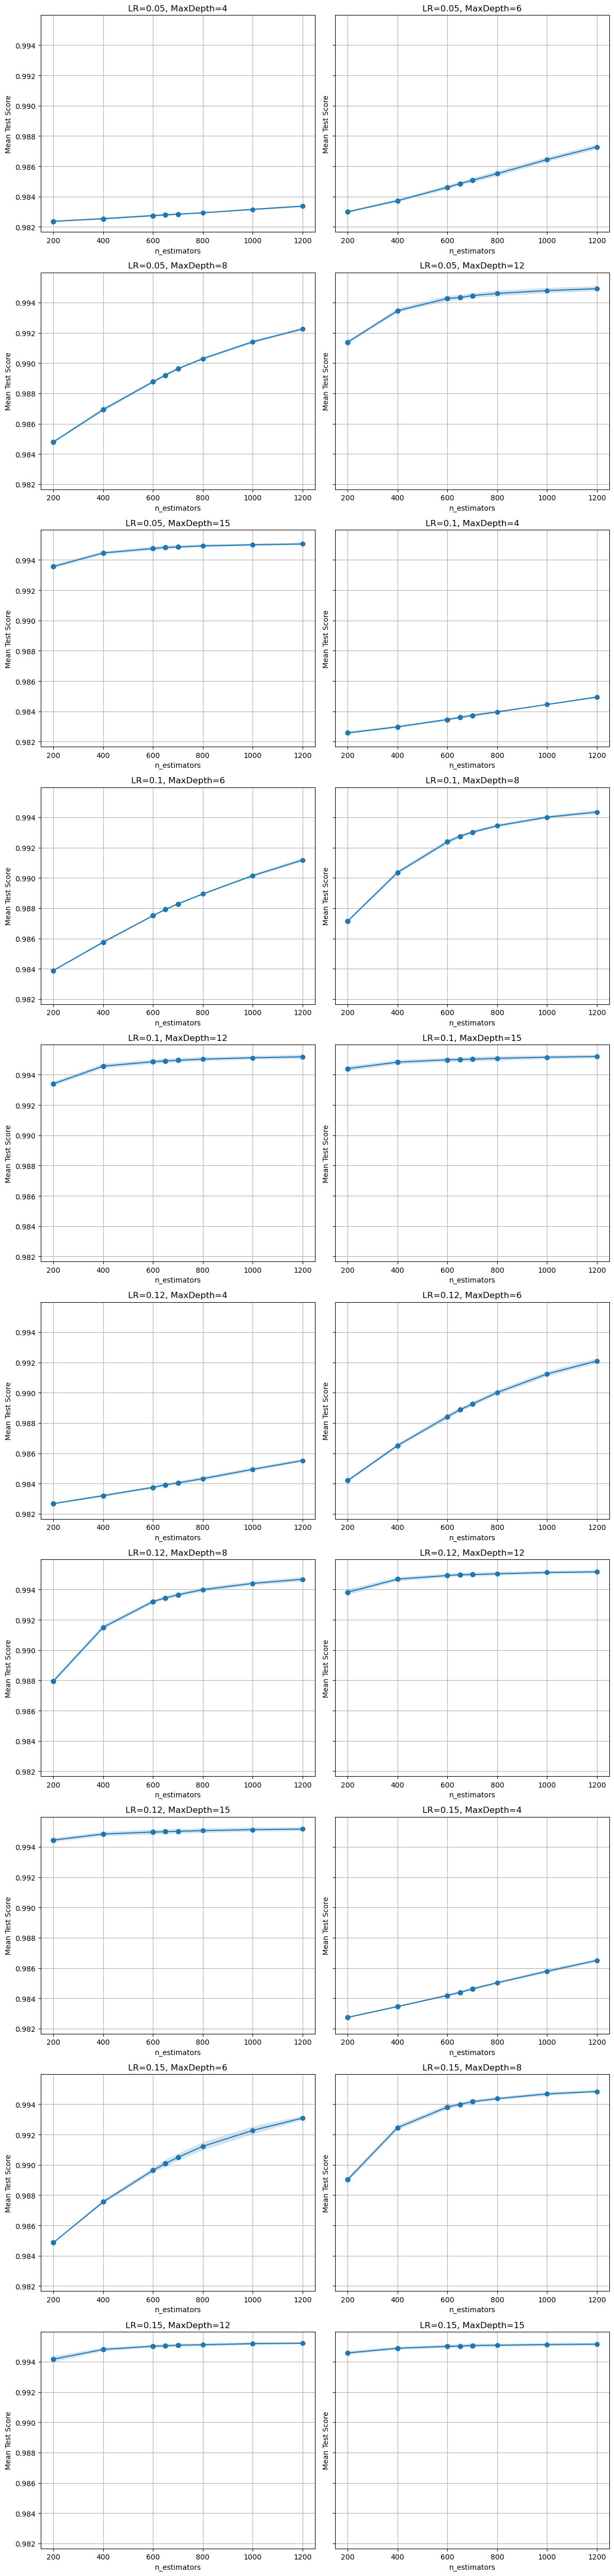

In [32]:
import matplotlib.pyplot as plt
import numpy as np

# Get unique combinations of learning_rate and max_depth
combinations = results_df.groupby(["param_learning_rate", "param_max_depth"])

n_combos = len(combinations)
rows = int(np.ceil(n_combos / 2))  # 2 columns
cols = 2

fig, axes = plt.subplots(rows, cols, figsize=(12, 5*rows), sharey=True)
axes = axes.flatten()

for i, ((lr, md), group) in enumerate(combinations):
    ax = axes[i]
    group = group.sort_values("param_n_estimators")

    ax.plot(group["param_n_estimators"], group["mean_test_score"], marker="o")
    ax.fill_between(group["param_n_estimators"],
                    group["mean_test_score"] - group["std_test_score"],
                    group["mean_test_score"] + group["std_test_score"],
                    alpha=0.2)

    ax.set_title(f"LR={lr}, MaxDepth={md}")
    ax.set_xlabel("n_estimators")
    ax.set_ylabel("Mean Test Score")
    ax.grid(True)

# Hide unused subplots
for j in range(i+1, len(axes)):
    axes[j].axis("off")

plt.tight_layout()
plt.show()


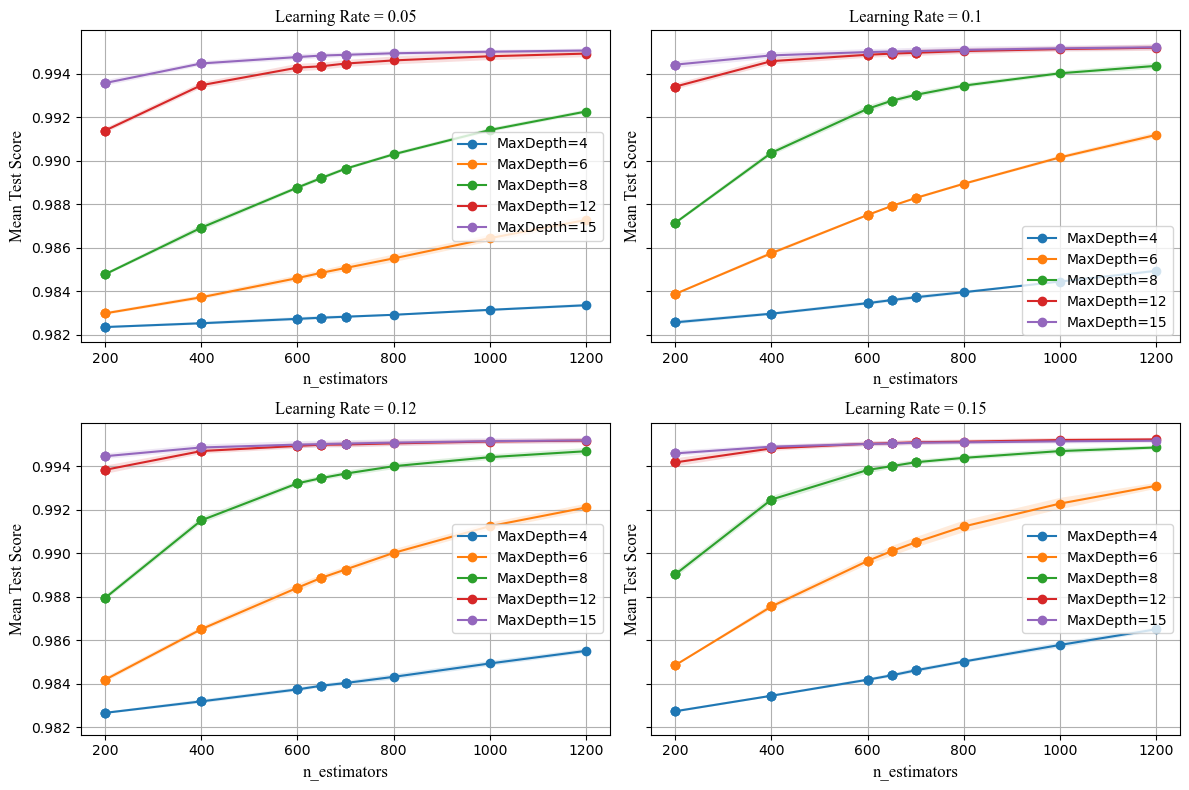

In [ ]:
# Plotting the results for xgboost results

learning_rates = sorted(results_df["param_learning_rate"].unique())
rows = int(np.ceil(len(learning_rates) / 2))  # 2 columns
cols = 2

fig, axes = plt.subplots(rows, cols, figsize=(12, 4*rows), sharey=True)
axes = axes.flatten()

for i, lr in enumerate(learning_rates):
    ax = axes[i]
    subset = results_df[results_df["param_learning_rate"] == lr]

    for md, group in subset.groupby("param_max_depth"):
        group = group.sort_values("param_n_estimators")
        label = f"MaxDepth={md}"
        
        ax.plot(group["param_n_estimators"], group["mean_test_score"], marker="o", label=label)
        ax.fill_between(group["param_n_estimators"],
                        group["mean_test_score"] - group["std_test_score"],
                        group["mean_test_score"] + group["std_test_score"],
                        alpha=0.15)

    ax.set_title(f"Learning Rate = {lr}", fontsize=12, fontname="Times New Roman")
    ax.set_xlabel("n_estimators", fontsize=12, fontname="Times New Roman")
    ax.set_ylabel("Mean Test Score", fontsize=12, fontname="Times New Roman")
    ax.grid(True)
    ax.legend()

# Hide unused subplots if < 4 learning rates
for j in range(i+1, len(axes)):
    axes[j].axis("off")

plt.tight_layout()
plt.show()


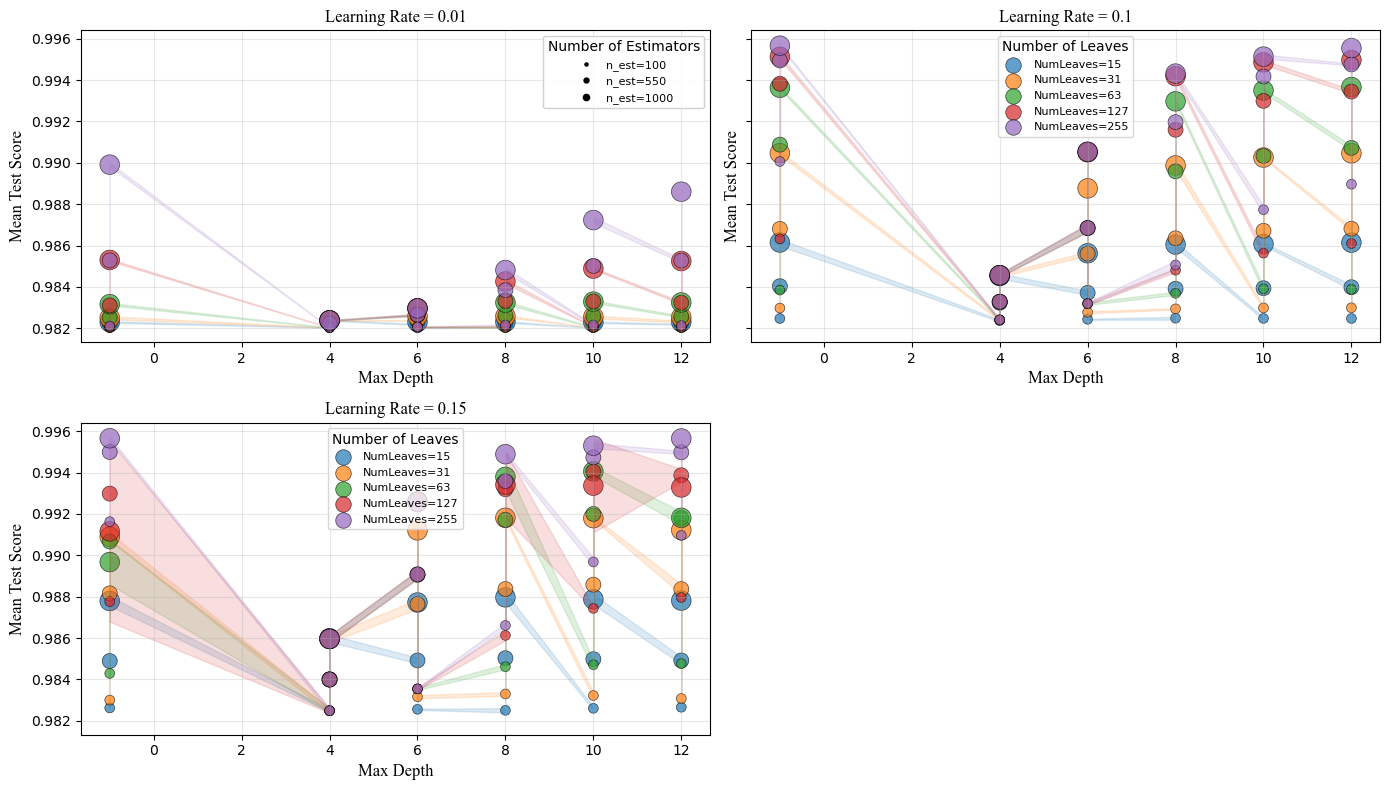

In [ ]:
import matplotlib.lines as mlines

# Filter out rows where n_estimators is NaN
results_df = lightgbm[lightgbm['param_n_estimators'].notna()].copy()
#results_df = results_df[results_df["param_num_leaves"] .isin([63,127,255])]

learning_rates = sorted(results_df["param_learning_rate"].unique())
rows = int(np.ceil(len(learning_rates) / 2))
cols = 2

# Create a color palette for num_leaves (using a sequential palette since num_leaves is quantitative)
num_leaves_values = sorted(results_df["param_num_leaves"].unique())
colors = sns.color_palette("tab10", len(num_leaves_values))  # Good for quantitative data
# Alternatively, use "plasma", "magma", or "inferno" for different color schemes

fig, axes = plt.subplots(rows, cols, figsize=(14, 4*rows), sharey=True)
axes = axes.flatten()

# Get unique n_estimators values for size legend
n_estimator_values = sorted(results_df['param_n_estimators'].unique())
# Create size mapping
max_n_estimators = results_df['param_n_estimators'].max()
min_n_estimators = results_df['param_n_estimators'].min()

for i, lr in enumerate(learning_rates):
    ax = axes[i]
    subset = results_df[results_df["param_learning_rate"] == lr]
    
    for j, (num_leaves, group) in enumerate(subset.groupby("param_num_leaves")):
        group = group.sort_values("param_max_depth")
        label = f"NumLeaves={num_leaves}"
        color = colors[j % len(colors)]  # Color by num_leaves
        
        # Normalized size scaling for n_estimators
        marker_sizes = 50 + 150 * (group["param_n_estimators"] - min_n_estimators) / (max_n_estimators - min_n_estimators)
        
        ax.scatter(group["param_max_depth"], group["mean_test_score"], 
                  s=marker_sizes, marker="o", label=label, color=color, 
                  alpha=0.7, edgecolors='black', linewidth=0.5)
        
        ax.fill_between(group["param_max_depth"],
                       group["mean_test_score"] - group["std_test_score"],
                       group["mean_test_score"] + group["std_test_score"],
                       alpha=0.15, color=color)

    ax.set_title(f"Learning Rate = {lr}", fontsize=12, fontname="Times New Roman")
    ax.set_xlabel("Max Depth", fontsize=12, fontname="Times New Roman")  # Changed to Max Depth
    ax.set_ylabel("Mean Test Score", fontsize=12, fontname="Times New Roman")
    ax.grid(True, alpha=0.3)
    
    # Add legend for num_leaves (color)
    ax.legend(loc='best', fontsize=8, title='Number of Leaves')

# Hide unused subplots
for j in range(i+1, len(axes)):
    axes[j].axis("off")

# Create size legend for n_estimators
size_legend_elements = []
sample_sizes = [min_n_estimators, (min_n_estimators + max_n_estimators)/2, max_n_estimators]
for size_val in sample_sizes:
    normalized_size = 50 + 150 * (size_val - min_n_estimators) / (max_n_estimators - min_n_estimators)
    proxy = mlines.Line2D([], [], color='black', marker='o', linestyle='None',
                         markersize=np.sqrt(normalized_size/10),
                         label=f'n_est={int(size_val)}')
    size_legend_elements.append(proxy)

# Add size legend to the first subplot
axes[0].legend(handles=size_legend_elements, loc='upper right', 
              fontsize=8, title='Number of Estimators', framealpha=0.9)

plt.tight_layout()
plt.show()

In [101]:
# Best parameters and results for both models

lgbm_best = lightgbm[lightgbm["mean_test_score"] == lightgbm["mean_test_score"].max()]
xgb_best = xgboost[xgboost["mean_test_score"] == xgboost["mean_test_score"].max()]
lgbm_best['model'] = 'LightGBM'
xgb_best['model'] = 'XGBoost'
best_results = pd.concat([lgbm_best, xgb_best], ignore_index=True)

/var/folders/zc/cx2984q17xs9k62vy4ms148w0000gn/T/ipykernel_62040/3357158922.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lgbm_best['model'] = 'LightGBM'
/var/folders/zc/cx2984q17xs9k62vy4ms148w0000gn/T/ipykernel_62040/3357158922.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  xgb_best['model'] = 'XGBoost'


In [102]:
best_results

,Unnamed: 0,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_max_depth,param_num_leaves,params,split0_test_score,...,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,cv,param_n_estimators,model,Unnamed: 0.2,Unnamed: 0.1
0,NaN,39.111449,1.004067,2.753857,0.099610,0.10,-1,255.0,"{'learning_rate': 0.1, 'max_depth': -1, 'n_est...",0.995728,...,0.995623,0.995615,0.995663,0.000043,1,5,1000.0,LightGBM,NaN,NaN
1,NaN,774.716579,6.083752,24.557349,1.506542,0.15,12,NaN,"{'learning_rate': 0.15, 'max_depth': 12, 'n_es...",0.995253,...,0.995188,0.995132,0.995224,0.000070,1,5,1200.0,XGBoost,358.0,NaN


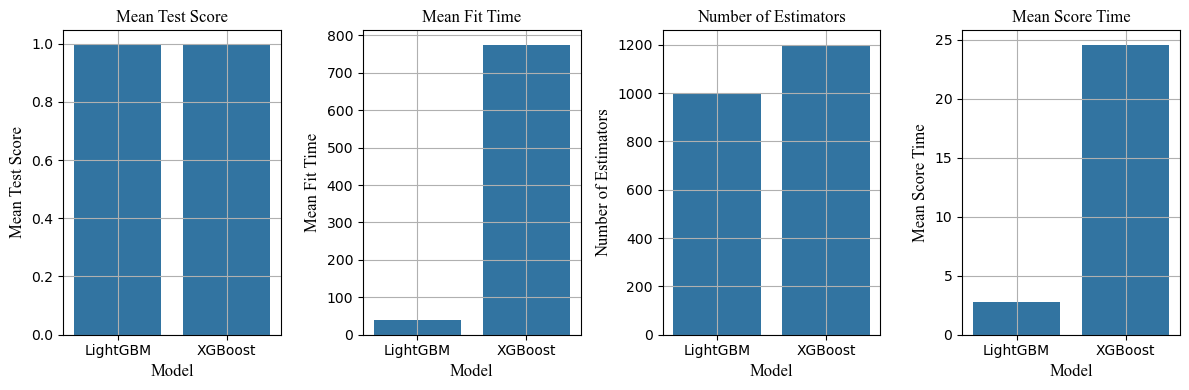

In [103]:
fig, axes = plt.subplots(1, 4, figsize=(12, 4))
axes = axes.flatten()

sns.barplot(data=best_results, x="model", y="mean_test_score", ax=axes[0])
axes[0].set_title("Mean Test Score", fontsize=12, fontname="Times New Roman")
axes[0].set_xlabel("Model", fontsize=12, fontname="Times New Roman")
axes[0].set_ylabel("Mean Test Score", fontsize=12, fontname="Times New Roman")
axes[0].grid(True)

sns.barplot(data=best_results, x="model", y="mean_fit_time", ax=axes[1])
axes[1].set_title("Mean Fit Time", fontsize=12, fontname="Times New Roman")
axes[1].set_xlabel("Model", fontsize=12, fontname="Times New Roman")
axes[1].set_ylabel("Mean Fit Time", fontsize=12, fontname="Times New Roman")
axes[1].grid(True)

sns.barplot(data=best_results, x="model", y="param_n_estimators", ax=axes[2])
axes[2].set_title("Number of Estimators", fontsize=12, fontname="Times New Roman")
axes[2].set_xlabel("Model", fontsize=12, fontname="Times New Roman")
axes[2].set_ylabel("Number of Estimators", fontsize=12, fontname="Times New Roman")
axes[2].grid(True)
sns.barplot(data=best_results, x="model", y="mean_score_time", ax=axes[3])
axes[3].set_title("Mean Score Time", fontsize=12, fontname="Times New Roman")
axes[3].set_xlabel("Model", fontsize=12, fontname="Times New Roman")
axes[3].set_ylabel("Mean Score Time", fontsize=12, fontname="Times New Roman")
axes[3].grid(True)

plt.tight_layout()
plt.show()

In [109]:
#Plotting best param
xgb_best_param = pd.read_csv('testing_best_param.csv')
lgbm_best_param = pd.read_csv('lightgbm_testing_best_param.csv')
xgb_best_param['model'] = 'XGBoost'
xgb_best_param = xgb_best_param[xgb_best_param['utility'] == xgb_best_param['utility'].max()]
lgbm_best_param['model'] = 'LightGBM'
testing_best_param = pd.concat([xgb_best_param, lgbm_best_param], ignore_index=True)
testing_best_param

,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,learning_rate,max_depth,n_estimators,cv,accuracy,TN,FP,FN,TP,auroc,auprc,f_measure,utility,model,num_leaves
0,0.0,NaN,NaN,0.15,12,1200.0,5.0,0.996196,304563,296,885,4698,0.999293,0.962894,0.888343,0.228132,XGBoost,NaN
1,NaN,NaN,0.0,0.10,-1,NaN,NaN,0.996672,304605,259,774,4804,0.000000,0.000000,0.902923,0.228638,LightGBM,255.0
